## **캘리포니아 주택 가격 예측하기**

### 1. 데이터 로드하고 전처리하기
- 라이브러리 가져오기

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

- 데이터 로드하기

In [ ]:
housing = fetch_california_housing()
#housing = load_boston()

In [ ]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [ ]:
X = housing.data           # ... 코드 입력
y = housing.target         # ... 코드 입력

df1 = pd.DataFrame(housing.data, columns= [housing.feature_names])
df2 = pd.DataFrame(housing.target, columns =[housing.target_names])
df = pd.concat([df1, df2], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- 학습용/검증용/테스트 데이터셋 분리하기

In [ ]:
# 전체 데이터 => 학습용/테스트용 데이터로 분리하기 (random_state=42 지정)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)         # ... 코드 입력

print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

# 학습용 데이터 => 학습용/검증용 데이터로 분리하기(random_state=42 지정)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)         # ... 코드 입력
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(16512, 8) (4128, 8) (16512,) (4128,)
(13209, 8) (3303, 8) (13209,) (3303,)


- 데이터 전처리하기 - 스케일링하기
    - fit() 단계: 데이터의 각 특성(컬럼)에 대한 평균(mean)과 표준편차(standard deviation)를 계산해요. 이런 통계치는 데이터를 스케일링할 때 사용.
    - transform() 단계: fit()에서 계산한 평균과 표준편차를 사용해 데이터를 변환. 구체적으로, 각 특성의 값에서 평균을 빼고 그 결과를 표준편차로 나눠줌으로써 데이터를 스케일링. 이 메서드는 학습 데이터에 대해 사용. 학습 데이터를 기준으로 데이터셋의 스케일을 조정하는 통계치를 계산하고, 이를 바탕으로 학습/검증/테스트 데이터셋을 변환.

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)         # ... 코드 입력
X_valid = scaler.transform(X_valid)         # ... 코드 입력
X_test = scaler.transform(X_test)         # ... 코드 입력

- 랜덤 씨드 설정하기

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

### 2. 모델 구성하고 학습하기

- 모델 구성하기

In [ ]:
# input_shape 선언하고
# 2개의 은닉층과 각 은닉층은 30개의 노드로 구성된 회귀 모델을 구성합니다.

input_shape = (8, )         # ... 코드 입력
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape = input_shape),        # ... 코드 입력
    keras.layers.Dense(30, activation="relu"),         # ... 코드 입력
    keras.layers.Dense(1, activation="linear")         # ... 코드 입력
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델 컴파일하기

In [ ]:
# loss = "mean_squared_error", optimizer = 'SGD(learning_rate=1e-3)'로 지정
# 아래와 같이 써도 상관 없음
model.compile(loss="mse",
              optimizer="sgd",
              metrics="MSE")      # ... 코드 입력

- 모델 학습하기

In [ ]:
# 학습 데이터, epochs = 20, 검증용 데이터 지정하여 학습한 후 결과를 history에 저장하기
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))    # ... 코드 입력

Epoch 1/20
413/413 [==============================] - 3s 4ms/step - loss: 0.8851 - MSE: 0.8851 - val_loss: 0.8960 - val_MSE: 0.8960
Epoch 2/20
413/413 [==============================] - 2s 5ms/step - loss: 0.4584 - MSE: 0.4584 - val_loss: 0.4445 - val_MSE: 0.4445
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 0.4053 - MSE: 0.4053 - val_loss: 0.4186 - val_MSE: 0.4186
Epoch 4/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3906 - MSE: 0.3906 - val_loss: 0.4080 - val_MSE: 0.4080
Epoch 5/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3805 - MSE: 0.3805 - val_loss: 0.4044 - val_MSE: 0.4044
Epoch 6/20
413/413 [==============================] - 1s 4ms/step - loss: 0.3723 - MSE: 0.3723 - val_loss: 0.4003 - val_MSE: 0.4003
Epoch 7/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3660 - MSE: 0.3660 - val_loss: 0.3932 - val_MSE: 0.3932
Epoch 8/20
413/413 [==============================] - 1s 3ms/step - loss: 0.

### 3. 모델 평가하고 예측하기

In [ ]:
# 테스트 데이터로 평가하기
mse_test = model.evaluate(X_test, y_test)    # ... 코드 입력

# 테스트 데이터로 예측하기
X_new = X_test[:3]
#y_pred = model.evaluate(X_new)     # ... 코드 입력
y_pred = model.evaluate(X_test)
y_pred

129/129 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - MSE: 0.0000e+00


[0.0, 0.0]

### 4.학습 과정 살펴보기

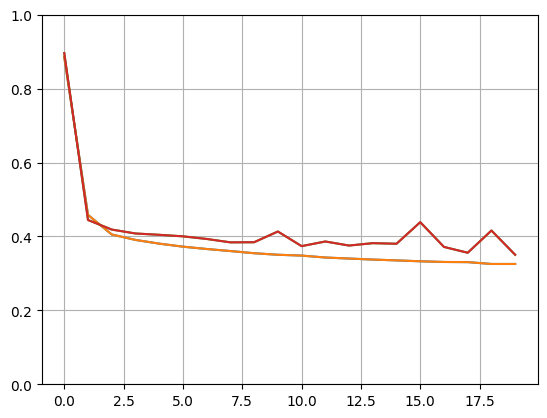

In [ ]:
# 방법1
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

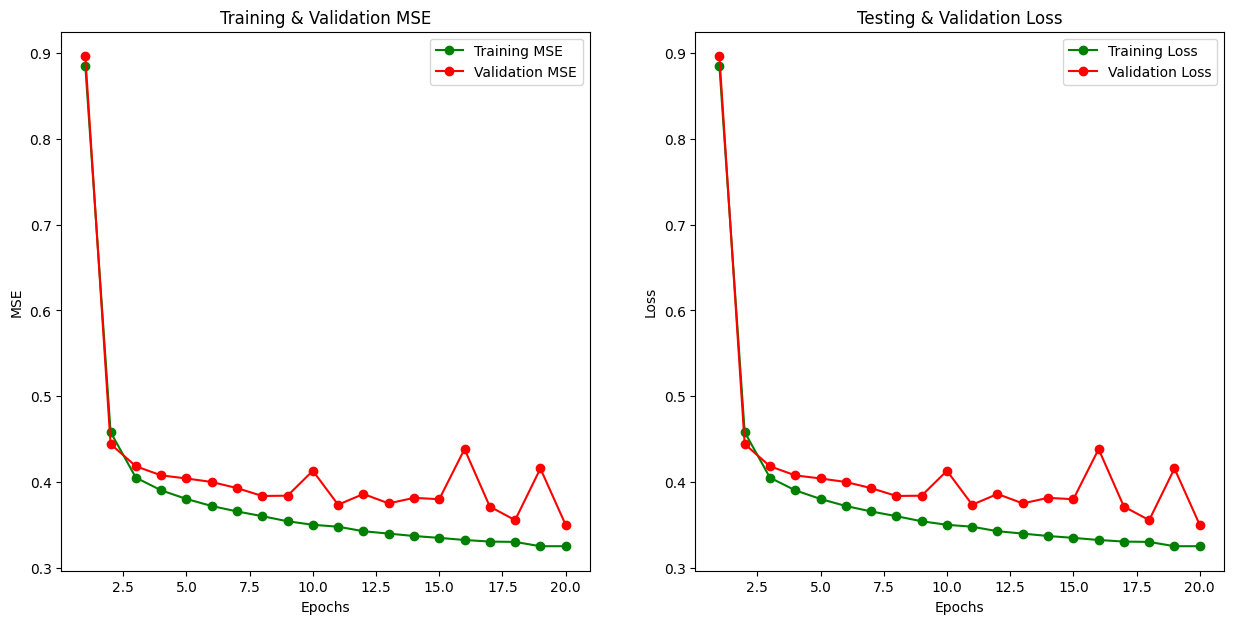

In [ ]:
# 학습과정 나타내기 방법2
fig , ax = plt.subplots(1,2)
train_acc = history.history['MSE']
train_loss = history.history['loss']
val_acc = history.history['val_MSE']
val_loss = history.history['val_loss']
fig.set_size_inches(15,7)

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training MSE')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation MSE')
ax[0].set_title('Training & Validation MSE')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("MSE")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

### 5. 저장 및 불러오기

In [ ]:
# 모델 구성하기
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
# 모델 컴파일하기
model.compile(loss=...)  # ... 코드 입력, optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 모델 학습하기
history = ...         # ... 코드 입력

# 모델 평가하기
mse_test = ...         # ... 코드 입력

# 모델 예측하기
model.predict(X_new)

- 모델 저장하고 불러우고

In [ ]:
# 패턴이랑 가중치 등등 모두 저장
model.save("my_keras_model.h5")

# 가중치만 저장
# model.load_weights("my_keras_weights.ckpt")
# model.save_weights("my_keras_weights.ckpt")

model = keras.models.load_model("my_keras_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 6. 훈련과정에서 콜백 사용하기

In [ ]:
# call back을 부른 적이 있다면 다시 저장한다는 의미
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

- 모델 구성하기

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

- 모델 컴파일하기

In [ ]:
model2.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

- 체크 포인터 지정, 조기 종료 설정하고 학습할때  callbacks 적용하기

In [ ]:
# 조기 종료하기
# patience =  loss가 안 줄어도 몇 번까지 참을지
early_stop = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# 체크 포인트 저장하기
check_point = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# 콜백 적용하여 학습하기
history = model2.fit(X_train, y_train, epochs=10000,
                    validation_data=(X_valid, y_valid),
                    callbacks=[check_point, early_stop])

Epoch 1/10000
413/413 [==============================] - 3s 6ms/step - loss: 0.3317 - val_loss: 0.3671
Epoch 2/10000
413/413 [==============================] - 2s 5ms/step - loss: 0.3311 - val_loss: 0.3683
Epoch 3/10000
413/413 [==============================] - 1s 3ms/step - loss: 0.3310 - val_loss: 0.3635
Epoch 4/10000
413/413 [==============================] - 1s 3ms/step - loss: 0.3305 - val_loss: 0.3636
Epoch 5/10000
413/413 [==============================] - 1s 3ms/step - loss: 0.3304 - val_loss: 0.3641
Epoch 6/10000
413/413 [==============================] - 1s 3ms/step - loss: 0.3297 - val_loss: 0.3643
Epoch 7/10000
413/413 [==============================] - 1s 4ms/step - loss: 0.3294 - val_loss: 0.3626
Epoch 8/10000
413/413 [==============================] - 2s 5ms/step - loss: 0.3291 - val_loss: 0.3621
Epoch 9/10000
413/413 [==============================] - 2s 5ms/step - loss: 0.3286 - val_loss: 0.3622
Epoch 10/10000
413/413 [==============================] - 2s 5ms/step - l

- 콜백 기능 클래스 만들어 사용하기

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

403/413 [============================>.] - ETA: 0s - loss: 0.3120
val/train: 1.27
413/413 [==============================] - 2s 5ms/step - loss: 0.3138 - val_loss: 0.3970
